# Data Exploration (Assignment 6)

* UPDATE: After examining the data sets in greater detail, I have decided to shift my study to examine the relationships between crime and the quality of police involvement (rather than Center City crime preventative efforts).
* Please note that the first few cells is me running basic data analysis on the data sets. Will be indicating when I follow Assignment 6's 5-step methodology after I find general patterns!
* There are two buckets of data sets I will be examining: 1) the types of Philly crimes (from 2015 - 2020, each year constitutes its own data set) and 2) complaints made against police officers, the demographics of the police indicted, and the demographics of those who filed the complaints against the police (from 2015 - 2020).  

In [1]:
import pandas as pd
import os

### 2015 Philly Crime Incidents (initial data exploration)

In [2]:
philly2015_df=pd.read_csv('../data/philly2015.csv')

In [3]:
philly2015_df.shape

(174723, 15)

In [4]:
philly2015_df.columns

Index(['objectid', 'dc_dist', 'psa', 'dispatch_date_time', 'dispatch_date',
       'dispatch_time', 'hour_', 'dc_key', 'location_block', 'ucr_general',
       'text_general_code', 'point_x', 'point_y', 'lat', 'lng'],
      dtype='object')

In [5]:
philly2015_df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,111,9,1,2015-04-15 11:14:00,2015-04-15,11:14:00,11,201509015124,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628
1,2,9,2,2015-01-31 12:45:00,2015-01-31,12:45:00,12,201509003948,1400 BLOCK SPRING GARDEN ST 210,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
2,3,9,2,2015-02-17 20:21:00,2015-02-17,20:21:00,20,201509006594,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
3,4,9,2,2015-04-01 08:05:00,2015-04-01,08:05:00,8,201509012932,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
4,5,9,2,2015-10-26 18:06:00,2015-10-26,18:06:00,18,201509045628,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446


In [6]:
philly2015_df.tail()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
174718,2610550,2,2,2015-01-21 01:31:00,2015-01-21,01:31:00,1,201502003891,1000 BLOCK TYSON AVE,700,Motor Vehicle Theft,-75.078542,40.051339,40.051339,-75.078542
174719,2610554,6,1,2015-05-01 08:50:00,2015-05-01,08:50:00,8,201506019258,1200 BLOCK WOOD ST,700,Motor Vehicle Theft,-75.158837,39.958448,39.958448,-75.158837
174720,2610555,17,2,2015-02-24 11:34:00,2015-02-24,11:34:00,11,201517006837,1400 BLOCK WARFIELD ST,700,Motor Vehicle Theft,-75.200196,39.936014,39.936014,-75.200196
174721,2610556,17,2,2015-12-29 15:00:00,2015-12-29,15:00:00,15,201517064727,1400 BLOCK WARFIELD ST,700,Motor Vehicle Theft,-75.200196,39.936014,39.936014,-75.200196
174722,2610560,17,2,2015-01-06 18:41:00,2015-01-06,18:41:00,18,201517000665,1200 BLOCK S 29TH ST,700,Motor Vehicle Theft,-75.191880,39.938243,39.938243,-75.191880


### Observations

* each row is a reported crime incident
* columns:
    * `objectid` - unique identification number for each case / crime (QUANTITATIVE)
    * `dc_dist` - distance from the Philadelphia Police? Need to confirm! (QUANTITATIVE)
    * `dispatch_date_time` - date and time in which the crime was reported (QUANTITATIVE)
    * `dispatch_date` - date in which the crime was reported (QUANTITATIVE)
    * `dispatch_time` - time in which the crime was reported (24 hour cycle) (QUANTITATIVE)
    * `hour_` - rounded hour for crime occurrence (note that hours round "down") (QUANTITATIVE)
    * `dc_key` - unique identification code (not sure for what though) (QUANTITATIVE)
    * `location_block` - general location area within Philadelphia region that the crime occurred at (QUALITATIVE)
    * `ucr_general` - broad UCR code, standard for crime reporting from FBI (QUANTITATIVE)
    * `text_general_code` - type of crime in coded format, standard for crime reporting from FBI (QUALITATIVE)
    * `point_x` - longitude coordinate (QUANTITATIVE)
    * `point_y` - latitude coordinate (QUANTITATIVE)
    * `lat` - equivalent of point_y column (QUANTITATIVE)
    * `lng` - equivalent of point_x column (QUANTITATIVE)

In [7]:
cols_to_use = ['objectid', 'dc_dist', 'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'hour_', 'dc_key', 'location_block', 'ucr_general', 'text_general_code', 'point_x', 'point_y', 'lat','lng']
philly2015_df2 = philly2015_df[cols_to_use]
philly2015_df2 = philly2015_df2.rename(columns={
    'objectid':'id',
    'dc_dist':'distance',
    'dispatch_date_time':'datetime',
    'dispatch_date':'date',
    'dispatch_time':'time',
    'hour_':'hour',
    'dc_key':'key',
    'location_block':'location',
    'ucr_general':'ucr',
    'text_general_code':'crimetype',
    'point_x':'x',
    'point_y':'y',
    'lat':'latitutde',
    'lng':'longitude'})
print(philly2015_df2)

             id  distance             datetime        date      time  hour  \
0           111         9  2015-04-15 11:14:00  2015-04-15  11:14:00    11   
1             2         9  2015-01-31 12:45:00  2015-01-31  12:45:00    12   
2             3         9  2015-02-17 20:21:00  2015-02-17  20:21:00    20   
3             4         9  2015-04-01 08:05:00  2015-04-01  08:05:00     8   
4             5         9  2015-10-26 18:06:00  2015-10-26  18:06:00    18   
...         ...       ...                  ...         ...       ...   ...   
174718  2610550         2  2015-01-21 01:31:00  2015-01-21  01:31:00     1   
174719  2610554         6  2015-05-01 08:50:00  2015-05-01  08:50:00     8   
174720  2610555        17  2015-02-24 11:34:00  2015-02-24  11:34:00    11   
174721  2610556        17  2015-12-29 15:00:00  2015-12-29  15:00:00    15   
174722  2610560        17  2015-01-06 18:41:00  2015-01-06  18:41:00    18   

                 key                         location  ucr  \
0

In [8]:
philly2015_df2['crimetype'].unique()

array(['Thefts', 'Aggravated Assault No Firearm',
       'Burglary Non-Residential', 'Robbery Firearm',
       'Theft from Vehicle', 'Robbery No Firearm', 'Burglary Residential',
       'Rape', 'Aggravated Assault Firearm', 'Vagrancy/Loitering',
       'Fraud', 'All Other Offenses', 'Other Assaults',
       'Vandalism/Criminal Mischief',
       'Other Sex Offenses (Not Commercialized)', 'Disorderly Conduct',
       'DRIVING UNDER THE INFLUENCE', 'Receiving Stolen Property',
       'Narcotic / Drug Law Violations', 'Weapon Violations',
       'Prostitution and Commercialized Vice', 'Public Drunkenness',
       'Liquor Law Violations', 'Arson', 'Embezzlement',
       'Forgery and Counterfeiting',
       'Offenses Against Family and Children', 'Gambling Violations',
       'Homicide - Criminal', 'Homicide - Criminal ',
       'Homicide - Justifiable ', 'Motor Vehicle Theft'], dtype=object)

In [9]:
philly2015_df2['crimetype'].value_counts()

All Other Offenses                         41180
Other Assaults                             23652
Thefts                                     22913
Vandalism/Criminal Mischief                15291
Theft from Vehicle                         12761
Fraud                                      12460
Narcotic / Drug Law Violations              7567
Burglary Residential                        6628
Aggravated Assault No Firearm               5392
DRIVING UNDER THE INFLUENCE                 3863
Robbery No Firearm                          3780
Disorderly Conduct                          2954
Robbery Firearm                             2854
Aggravated Assault Firearm                  2260
Motor Vehicle Theft                         1669
Burglary Non-Residential                    1451
Rape                                        1324
Weapon Violations                           1324
Other Sex Offenses (Not Commercialized)     1078
Prostitution and Commercialized Vice        1049
Vagrancy/Loitering  

In [10]:
philly2015_df2.groupby('crimetype').size().plot(kind='bar', figsize=(12,4))

<AxesSubplot:xlabel='crimetype'>

In [11]:
philly2015_df2.groupby('crimetype')['hour'].mean()

crimetype
Aggravated Assault Firearm                 13.482301
Aggravated Assault No Firearm              12.890208
All Other Offenses                         13.730719
Arson                                      10.504615
Burglary Non-Residential                   10.205376
Burglary Residential                       13.433162
DRIVING UNDER THE INFLUENCE                10.215377
Disorderly Conduct                         14.187204
Embezzlement                               13.734015
Forgery and Counterfeiting                 14.304762
Fraud                                      14.239727
Gambling Violations                        14.045455
Homicide - Criminal                        14.197368
Homicide - Criminal                        11.604167
Homicide - Justifiable                      5.500000
Liquor Law Violations                      15.375912
Motor Vehicle Theft                        12.614140
Narcotic / Drug Law Violations             15.885688
Offenses Against Family and Children

### 2015 Philly Crime Incidents (Assignment 6 five-step blocks) | #1

In this block, I will answer the question: what is the distribution of drug (Narcotic / Drug Law Violations) incidents by the Philadelphia Police in 2015? 

STEPS:
* Create filters for rows where `crimetype` is 'Narcotic / Drug Law Violations'
* Count the number of rows
* Graph time of day and drug violations occurrences

In [12]:
# Create filters for rows where `crimetype` is 'Narcotic / Drug Law Violations' 
philly2015drug_filter = philly2015_df2['crimetype']=='Narcotic / Drug Law Violations'
philly2015drug_df = philly2015_df2[philly2015drug_filter]

# Count the number of rows 
philly2015drug_df.shape

(7567, 14)

<AxesSubplot:xlabel='hour'>

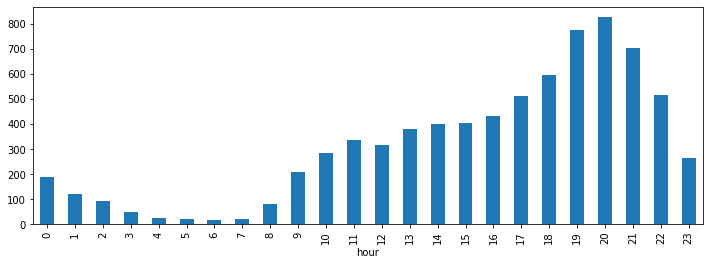

In [13]:
# Graph time of day and drug violations occurrences
philly2015drug_df.groupby('hour').size().plot(kind='bar', figsize=(12,4))

In narrative form, there are over 7500 instances of narcotic and drug law violations documented by the Philadelphia Police in 2015. 

Some observations:
* Peak hour of violations occur at the 20-mark (8:00 PM EST), most "inactive" hour is at the 6-mark (6:00 AM EST). 
* Wonder if this pattern follows similar trajectory in future years.

### 2016 Philly Crime Incidents (initial data exploration)

In [14]:
philly2016_df=pd.read_csv('../data/philly2016.csv')

In [15]:
philly2016_df.shape

(159605, 15)

In [16]:
philly2016_df.columns

Index(['objectid', 'dc_dist', 'psa', 'dispatch_date_time', 'dispatch_date',
       'dispatch_time', 'hour_', 'dc_key', 'location_block', 'ucr_general',
       'text_general_code', 'point_x', 'point_y', 'lat', 'lng'],
      dtype='object')

In [17]:
philly2016_df.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,112,9,1,2016-08-09 20:07:00,2016-08-09,20:07:00,20,201609031759,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628
1,113,9,1,2016-10-18 09:54:00,2016-10-18,09:54:00,9,201609042436,100 BLOCK S BROAD ST,500,Burglary Non-Residential,-75.066628,40.049264,40.049264,-75.066628
2,130,9,2,2016-06-06 10:49:00,2016-06-06,10:49:00,10,201609022092,1400 BLOCK SPRING GARDEN ST,400,Aggravated Assault No Firearm,-75.161446,39.962334,39.962334,-75.161446
3,131,9,2,2016-06-06 10:50:00,2016-06-06,10:50:00,10,201609022093,1400 BLOCK SPRING GARDEN ST,400,Aggravated Assault No Firearm,-75.161446,39.962334,39.962334,-75.161446
4,132,9,2,2016-06-21 13:40:00,2016-06-21,13:40:00,13,201609024487,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446


In [18]:
philly2016_df.tail()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
159600,2610141,12,4,2016-11-19 13:58:00,2016-11-19,13:58:00,13,201612079500,1000 BLOCK S 57TH ST,700,Motor Vehicle Theft,-75.237079,39.945671,39.945671,-75.237079
159601,2610145,25,3,2016-06-02 12:45:00,2016-06-02,12:45:00,12,201625045811,3600 BLOCK N LAWRENCE ST,700,Motor Vehicle Theft,-75.136248,40.006015,40.006015,-75.136248
159602,2610552,25,2,2016-05-01 17:33:00,2016-05-01,17:33:00,17,201625035581,100 BLOCK E WINGOHOCKING ST,700,Motor Vehicle Theft,-75.124737,40.018374,40.018374,-75.124737
159603,674400,14,1,2016-02-23 17:29:00,2016-02-23,17:29:00,1,201614096797,1900 BLOCK RENOVO ST,600,Thefts,-75.149307,40.068115,40.068115,-75.149307
159604,777306,4,A,2016-06-21 10:43:00,2016-06-21,10:43:00,14,201604054585,100 BLOCK DURFOR ST,600,Thefts,-75.149997,39.918718,39.918718,-75.149997


In [19]:
cols_to_use = ['objectid', 'dc_dist', 'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'hour_', 'dc_key', 'location_block', 'ucr_general', 'text_general_code', 'point_x', 'point_y', 'lat','lng']
philly2016_df2 = philly2016_df[cols_to_use]
philly2016_df2 = philly2016_df2.rename(columns={
    'objectid':'id',
    'dc_dist':'distance',
    'dispatch_date_time':'datetime',
    'dispatch_date':'date',
    'dispatch_time':'time',
    'hour_':'hour',
    'dc_key':'key',
    'location_block':'location',
    'ucr_general':'ucr',
    'text_general_code':'crimetype',
    'point_x':'x',
    'point_y':'y',
    'lat':'latitutde',
    'lng':'longitude'})
print(philly2016_df2)

             id  distance             datetime        date      time  hour  \
0           112         9  2016-08-09 20:07:00  2016-08-09  20:07:00    20   
1           113         9  2016-10-18 09:54:00  2016-10-18  09:54:00     9   
2           130         9  2016-06-06 10:49:00  2016-06-06  10:49:00    10   
3           131         9  2016-06-06 10:50:00  2016-06-06  10:50:00    10   
4           132         9  2016-06-21 13:40:00  2016-06-21  13:40:00    13   
...         ...       ...                  ...         ...       ...   ...   
159600  2610141        12  2016-11-19 13:58:00  2016-11-19  13:58:00    13   
159601  2610145        25  2016-06-02 12:45:00  2016-06-02  12:45:00    12   
159602  2610552        25  2016-05-01 17:33:00  2016-05-01  17:33:00    17   
159603   674400        14  2016-02-23 17:29:00  2016-02-23  17:29:00     1   
159604   777306         4  2016-06-21 10:43:00  2016-06-21  10:43:00    14   

                 key                     location  ucr  \
0    

In [20]:
philly2016_df2['crimetype'].value_counts()

All Other Offenses                         29568
Other Assaults                             23824
Thefts                                     22489
Vandalism/Criminal Mischief                15682
Theft from Vehicle                         13753
Fraud                                      11776
Narcotic / Drug Law Violations              7993
Burglary Residential                        5601
Aggravated Assault No Firearm               5348
DRIVING UNDER THE INFLUENCE                 3701
Robbery No Firearm                          3473
Robbery Firearm                             2650
Aggravated Assault Firearm                  2241
Weapon Violations                           1899
Disorderly Conduct                          1581
Motor Vehicle Theft                         1550
Burglary Non-Residential                    1393
Rape                                        1234
Other Sex Offenses (Not Commercialized)      927
Prostitution and Commercialized Vice         924
Arson               

<AxesSubplot:xlabel='crimetype'>

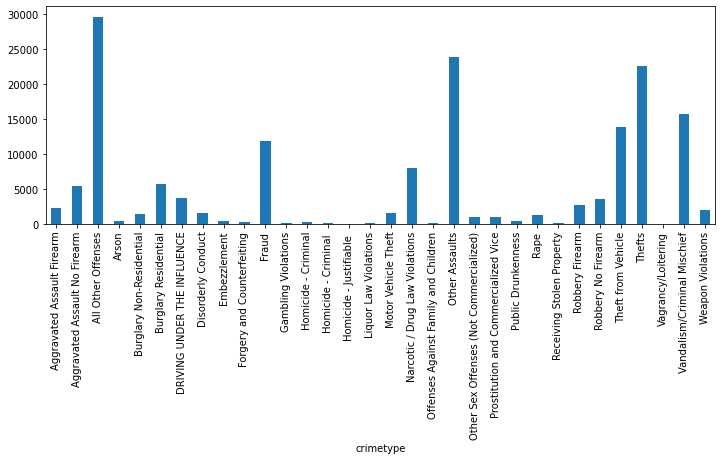

In [21]:
philly2016_df2.groupby('crimetype').size().plot(kind='bar', figsize=(12,4))

In [22]:
philly2016_df2.groupby('crimetype')['hour'].mean()

crimetype
Aggravated Assault Firearm                 13.641232
Aggravated Assault No Firearm              13.153328
All Other Offenses                         13.240970
Arson                                      10.004843
Burglary Non-Residential                   10.093324
Burglary Residential                       13.158722
DRIVING UNDER THE INFLUENCE                10.526885
Disorderly Conduct                         14.047438
Embezzlement                               13.824324
Forgery and Counterfeiting                 14.223214
Fraud                                      14.224694
Gambling Violations                        15.380952
Homicide - Criminal                        14.298246
Homicide - Criminal                        13.978723
Homicide - Justifiable                     23.000000
Liquor Law Violations                      15.439024
Motor Vehicle Theft                        12.562581
Narcotic / Drug Law Violations             15.770549
Offenses Against Family and Children

In [23]:
philly2016drug_filter = philly2016_df2['crimetype']=='Narcotic / Drug Law Violations'
philly2016drug_df = philly2016_df2[philly2016drug_filter]
philly2016drug_df.shape

(7993, 14)

<AxesSubplot:xlabel='hour'>

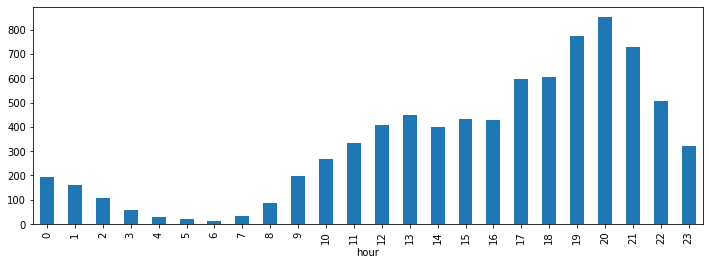

In [24]:
philly2016drug_df.groupby('hour').size().plot(kind='bar', figsize=(12,4))

### 2016 Philly Crime Incidents (Assignment 6 five-step blocks) | #2

In this block, I will answer the question: which hour reported the most occurrences of crime incidents (aka which hour is the most "dangerous")? 

STEPS:
* Find the most frequent # of crimes reported by a police in a given hour using the data in the `hour` column.

In [25]:
# Find the most frequent # of crimes reported by a police in a given hour using the data in the `hour` column. Name the result `max_hour2016`.
philly2016_df2['hour'].value_counts()

16    10714
17    10107
12     9263
18     9104
11     9024
19     9006
13     8904
15     8699
20     8570
10     8315
21     7930
14     7445
9      7415
22     7081
23     6661
0      6237
8      5720
1      5083
2      3764
7      3102
3      2771
4      1826
5      1473
6      1391
Name: hour, dtype: int64

In narrative form, hour 16 (4:00 PM) and hour 17 (5:00 PM) result in the most crime occurrences. Hour 6 (6:00 AM) has the least crime occurrences (by almost 8 times less).

Some observations:
* 9:00 AM is just as "dangerous" as 2:00 PM and 10:00 PM (morning, afternoon, evening)
* At 4:00 PM and 5:00 PM during most parts of the year, there is still considerable light outside. 
* Putting together what I learned from Block 1's exercise, it seems like narcotic / drug law violations occur on a different timeline than the rest of the crimes and are not representative of when most crimes occur. 
* Wonder what crimes are common during the peak hours of 4:00 PM? 

### 2016 Philly Crime Incidents (Assignment 6 five-step blocks) | #3

In this block, I will answer the question: at 4:00 PM, which crime is most likely to occur? 

STEPS:
* Create filter for rows where `hour` is 16.
* Subset the data frame.
* Count the number of occurrences of each crime at 4:00 PM.

In [26]:
# Create filter for rows where `hour` is 16.
hour16_filter=philly2016_df2['hour']==16

# Subset the data frame.
philly2016_hour16_df=philly2016_df2[(hour16_filter)]

# Count the number of occurrences of each crime at 4:00 PM.
philly2016_hour16_df['crimetype'].value_counts()

Thefts                                     2105
Other Assaults                             1857
All Other Offenses                         1493
Fraud                                      1060
Vandalism/Criminal Mischief                 971
Theft from Vehicle                          845
Burglary Residential                        466
Narcotic / Drug Law Violations              429
Aggravated Assault No Firearm               318
Robbery No Firearm                          221
Disorderly Conduct                          120
Rape                                        103
Motor Vehicle Theft                          97
Robbery Firearm                              91
Aggravated Assault Firearm                   91
Other Sex Offenses (Not Commercialized)      88
DRIVING UNDER THE INFLUENCE                  81
Weapon Violations                            70
Burglary Non-Residential                     60
Embezzlement                                 42
Public Drunkenness                      

In narrative form, at 4:00 PM, the most common crime that occurs is Theft, followed by "Other Assaults" and "All Other Offenses". Since the latter two categories are more ambiguous, a more insightful runner up would be Fraud. At this hour, the least common case relate to Liquor Law Violations. 

Some observations:
* Top most common crimes that occur at this hour involve some form of stealing or unlawful "financial" gain, rather than influential 3rd party sources (i.e. alcohol, drugs).
* What do "Other Assaults" and "All Other Offenses" entail? 
* Where do these thefts occur? <-- Not sure if this can be answered with the limitations of the data set.

### Types of Complaints Against Police (initial data exploration)

* There are also 2017, 2018, 2019, and 2020 crime incident data sets! Before I analyze the remaining data, I will shift gears and begin to explore another topic of datasets to draw some preliminary patterns!

In [27]:
complaints_df=pd.read_csv('../data/complaints.csv')

In [28]:
complaints_df.shape

(3374, 5)

In [29]:
complaints_df.columns

Index(['complaint_id', 'date_received', 'district_occurrence',
       'general_cap_classification', 'summary'],
      dtype='object')

In [30]:
complaints_df.head()

,complaint_id,date_received,district_occurrence,general_cap_classification,summary
0,15-0517,2015-09-02,900,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 7-5-15 at 4:0..."
1,15-0518,2015-09-02,300,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 6-12-15 at 11..."
2,15-0519,2015-09-02,2600,VERBAL ABUSE,"According to the complainant, on 8-16-15 at 4:..."
3,15-0520,2015-09-03,600,CIVIL RIGHTS COMPLAINT,"According to the complainant, on 08-28-15 at 1..."
4,15-0521,2015-09-03,3500,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 8-28-15 at 10..."


In [31]:
complaints_df.tail()

,complaint_id,date_received,district_occurrence,general_cap_classification,summary
3369,20-0453,2020-08-25,1400,UNPROFESSIONAL CONDUCT,"According to the complainant, since May of 202..."
3370,20-0454,2020-08-28,900,LACK OF SERVICE,"According to the complainant, on 8-26-20 at 5:..."
3371,20-0455,2020-08-28,3900,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 8-18-20 at 10..."
3372,20-0456,2020-08-31,800,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 8-27-20 at 6:..."
3373,20-0457,2020-08-28,1900,PHYSICAL ABUSE,"According to the complainant, on 2-18-20, they..."


### Observations

* each row is a reported complaint incident
* columns:
    * `complaint_id` - unique identification number for each complaint (QUANTITATIVE)
    * `date_received` - date in which the complaint was received (QUANTITATIVE)
    * `district_occurrence` - numerical identification district number (QUANTITATIVE)
    * `general_cap_classification` - type of complaint (QUALITATIVE)
    * `summary` - more information about the complaint (QUALITATIVE)

In [32]:
cols_to_use = ['complaint_id', 'date_received', 'district_occurrence', 'general_cap_classification', 'summary']
complaints_df2 = complaints_df[cols_to_use]
complaints_df2 = complaints_df2.rename(columns={
    'complaint_id':'id',
    'date_received':'date',
    'district_occurrence':'district',
    'general_cap_classification':'type',
    'summary':'summary'})
print(complaints_df2)

           id        date district                      type  \
0     15-0517  2015-09-02      900   DEPARTMENTAL VIOLATIONS   
1     15-0518  2015-09-02      300   DEPARTMENTAL VIOLATIONS   
2     15-0519  2015-09-02     2600              VERBAL ABUSE   
3     15-0520  2015-09-03      600    CIVIL RIGHTS COMPLAINT   
4     15-0521  2015-09-03     3500   DEPARTMENTAL VIOLATIONS   
...       ...         ...      ...                       ...   
3369  20-0453  2020-08-25     1400    UNPROFESSIONAL CONDUCT   
3370  20-0454  2020-08-28      900           LACK OF SERVICE   
3371  20-0455  2020-08-28     3900   DEPARTMENTAL VIOLATIONS   
3372  20-0456  2020-08-31      800   DEPARTMENTAL VIOLATIONS   
3373  20-0457  2020-08-28     1900            PHYSICAL ABUSE   

                                                summary  
0     According to the complainant, on 7-5-15 at 4:0...  
1     According to the complainant, on 6-12-15 at 11...  
2     According to the complainant, on 8-16-15 at 4:...  

In [33]:
complaints_df2['type'].unique()

array([' DEPARTMENTAL VIOLATIONS', ' VERBAL ABUSE',
       ' CIVIL RIGHTS COMPLAINT', ' CRIMINAL ALLEGATION', ' DOMESTIC',
       ' PHYSICAL ABUSE', ' LACK OF SERVICE', ' HARASSMENT',
       ' FALSIFICATION', ' NON-INVESTIGATORY INCIDENT',
       ' UNPROFESSIONAL CONDUCT', ' SEXUAL CRIME/MISCONDUCT', ' DRUGS',
       'USE OF FORCE INTERNAL'], dtype=object)

In [34]:
complaints_df2['type'].value_counts()

 DEPARTMENTAL VIOLATIONS       903
 LACK OF SERVICE               725
 PHYSICAL ABUSE                546
 VERBAL ABUSE                  339
 UNPROFESSIONAL CONDUCT        228
 NON-INVESTIGATORY INCIDENT    158
 HARASSMENT                    157
 CRIMINAL ALLEGATION           145
 CIVIL RIGHTS COMPLAINT         99
 DOMESTIC                       43
 SEXUAL CRIME/MISCONDUCT        13
 FALSIFICATION                  13
 DRUGS                           4
USE OF FORCE INTERNAL            1
Name: type, dtype: int64

In [35]:
complaints_df2['district'].value_counts()

1500                  257
3500                  249
2500                  239
1900                  234
1800                  220
1400                  218
2200                  189
600                   187
2400                  165
1200                  159
900                   156
200                   149
3900                  145
800                   133
1600                  120
300                   109
700                    77
1700                   75
100                    71
2600                   59
500                    39
7700                   22
Other Jurisdiction      7
400                     6
2300                    3
9                       1
Name: district, dtype: int64

In [36]:
complaints_df2['date'].value_counts()

2015-12-31    31
2016-12-31    17
2016-12-19    15
2016-08-03    14
2016-06-15    13
              ..
2017-09-11     1
2019-04-18     1
2016-05-27     1
2018-08-21     1
2016-04-29     1
Name: date, Length: 985, dtype: int64

### Types of Complaints Against Police (Assignment 6 five-step blocks) | #4

In this block, I will answer the question(s): within District 1500, what is the most common complaint issued, and on December 31, 2015, what was the most common complaint issued?

STEPS (FOR DISTRICT  1500):
* Create filter for rows where `district` is 1500.
* Subset the data frame.
* Count the number of occurrences of each complaint.

STEPS (FOR DECEMBER 31, 2015):
* Create filter for rows where `date` is 2015-12-31.
* Subset the data frame.
* Count the number of occurrences of each complaint.

In [37]:
# FOR DISTRICT 1500: 
# Create filter for rows where `district` is 1500.
district_filter=complaints_df2['district']=='1500'

# Subset the data frame.
complaints_district1500_df=complaints_df2[(district_filter)]

# Count the number of occurrences of each complaint.
complaints_district1500_df['type'].value_counts()

 LACK OF SERVICE               69
 DEPARTMENTAL VIOLATIONS       60
 PHYSICAL ABUSE                36
 VERBAL ABUSE                  26
 HARASSMENT                    23
 UNPROFESSIONAL CONDUCT        16
 NON-INVESTIGATORY INCIDENT     9
 CRIMINAL ALLEGATION            7
 CIVIL RIGHTS COMPLAINT         7
 DOMESTIC                       3
 SEXUAL CRIME/MISCONDUCT        1
Name: type, dtype: int64

In [38]:
# FOR DECEMBER 31, 2015: 
# Create filter for rows where `date` is 2015-12-31.
date_filter=complaints_df2['date']=='2015-12-31'

# Subset the data frame.
complaints_date_df=complaints_df2[(date_filter)]

# Count the number of occurrences of each complaint.
complaints_date_df['type'].value_counts()

 LACK OF SERVICE               13
 DEPARTMENTAL VIOLATIONS        7
 NON-INVESTIGATORY INCIDENT     5
 VERBAL ABUSE                   3
 PHYSICAL ABUSE                 2
 CRIMINAL ALLEGATION            1
Name: type, dtype: int64

In narrative form, the most common complaint that was issued in district 1500 and on December 31, 2015 was Lack of Service. Criminal allegation remained low for both factors.

Some observations:
* Despite Departmental Violations being the most common complaint overall, I was surprised to see that Lack of Service was the most common when filtering by district and by date. 
* In which district does Lack of Service occur most? This may say something about how that particular district is run.

### Demographics of Police (initial data exploration)

In [39]:
police_df=pd.read_csv('../data/police.csv')

In [40]:
police_df.shape

(8397, 8)

In [41]:
police_df.columns

Index(['complaint_id', 'officer_id', 'po_race', 'po_sex', 'po_assigned_unit',
       'allegations_investigated', 'investigative_findings',
       'disciplinary_findings'],
      dtype='object')

In [42]:
police_df.head()

,complaint_id,officer_id,po_race,po_sex,po_assigned_unit,allegations_investigated,investigative_findings,disciplinary_findings
0,15-0517,52344629.0,black,male,4500 CENTER CITY DISTRIC,Departmental Violation,Sustained Finding,Training/Counseling
1,15-0517,52344629.0,black,male,4500 CENTER CITY DISTRIC,Departmental Violation,No Sustained Findings,Not Applicable
2,15-0518,21536218.0,black,male,0300 03RD DISTRICT,Departmental Violation,No Sustained Findings,Not Applicable
3,15-0519,63360139.0,white,male,2600 26TH DISTRICT,Verbal Abuse,No Sustained Findings,Not Applicable
4,15-0519,63360139.0,white,male,2600 26TH DISTRICT,Departmental Violation,Sustained Finding,Training/Counseling


In [43]:
police_df.tail()

,complaint_id,officer_id,po_race,po_sex,po_assigned_unit,allegations_investigated,investigative_findings,disciplinary_findings
8392,20-0456,42523881.0,white,male,0700 07TH DISTRICT,Investigation OnGoing,Pending,Pending
8393,20-0456,94396173.0,white,male,0700 07TH DISTRICT,Investigation OnGoing,Pending,Pending
8394,20-0457,63150712.0,black,male,1900 19TH DISTRICT,Investigation OnGoing,Pending,Pending
8395,20-0457,25528375.0,white,male,1900 19TH DISTRICT,Investigation OnGoing,Pending,Pending
8396,8396,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations

* each row is information about the police officer in question with each corresponding complaint
* columns:
    * `complaint_id` - unique identification number for each complaint (QUANTITATIVE)
    * `officer_id` - unique identification number for each officer (QUANTITATIVE)
    * `po_race` - race of police officer (QUALITATIVE)
    * `po_sex` - sex of police officer (QUALITATIVE)
    * `po_assigned_unit` - district in which police officer is assigned to (QUALITATIVE)
    * `allegations_investigated` - status of investigation (QUALITATIVE)
    * `investigative_findings` - status of investigation (QUALITATIVE)
    * `disciplinary_findings` - status of investigation (QUALITATIVE)

In [44]:
police_df['po_sex'].value_counts(normalize=True)

male      0.84878
female    0.15122
Name: po_sex, dtype: float64

### Demographics of Police (Assignment 6 five-step blocks) | #5

In this block, I will answer the question: how does race impact what complaints police receive? 

STEPS:
* Create filters for each gender.
* Create filters for studied races (black & white).
* Create subsets `whitemale_df`, `whitefemale_df`, `blackmale_df`, `blackfemale_df`.
* Graph results!

In [45]:
# Create filters for each gender.
male_filter=police_df['po_sex']=='male'
phillymale_df=police_df[male_filter]

In [46]:
phillymale_df['po_race'].value_counts(normalize=True)

white     0.624460
black     0.254879
latino    0.090868
asian     0.022643
other     0.007150
Name: po_race, dtype: float64

<AxesSubplot:xlabel='po_race'>

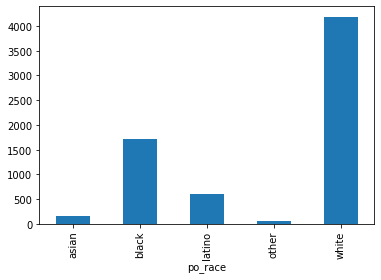

In [47]:
phillymale_df.groupby('po_race').size().plot(kind='bar')

In [48]:
phillymale_df['allegations_investigated'].value_counts(normalize=True)

Departmental Violation                           0.372412
Lack of Service                                  0.165947
Physical Abuse                                   0.112915
Verbal Abuse                                     0.105318
Investigation OnGoing                            0.071056
Unprofessional Conduct                           0.059288
Civil Rights Complaint                           0.024430
Harassment                                       0.023387
Criminal Allegation                              0.023387
No C.A.P. Investigation                          0.022494
Referred to Other Agency/C.A.P. Investigation    0.007448
Domestic                                         0.003277
Sexual Crime/Misconduct                          0.002532
Falsification                                    0.002086
Other Misconduct                                 0.001937
Disciplinary Code Violation                      0.001341
Drugs                                            0.000596
#VALUE!       

<AxesSubplot:xlabel='allegations_investigated'>

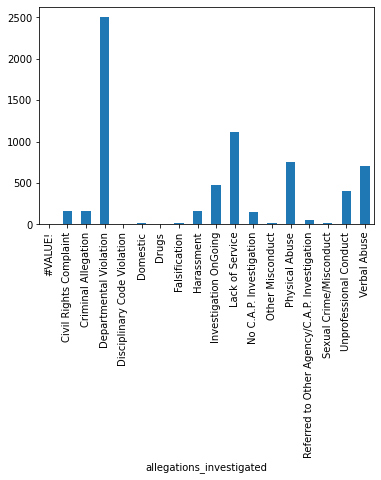

In [49]:
phillymale_df.groupby('allegations_investigated').size().plot(kind='bar')

In [50]:
# Create filters for each gender.
female_filter=police_df['po_sex']=='female'
phillyfemale_df=police_df[female_filter]

In [51]:
phillyfemale_df['po_race'].value_counts(normalize=True)

black     0.509197
white     0.340301
latino    0.112040
other     0.018395
asian     0.016722
indian    0.003344
Name: po_race, dtype: float64

<AxesSubplot:xlabel='po_race'>

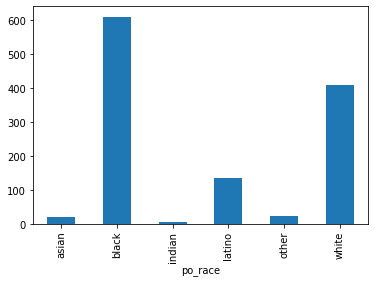

In [52]:
phillyfemale_df.groupby('po_race').size().plot(kind='bar')

In [53]:
phillyfemale_df['allegations_investigated'].value_counts(normalize=True)

Departmental Violation                           0.341137
Lack of Service                                  0.204013
Unprofessional Conduct                           0.107023
Verbal Abuse                                     0.091973
Investigation OnGoing                            0.054348
Physical Abuse                                   0.048495
Harassment                                       0.045151
No C.A.P. Investigation                          0.034281
Criminal Allegation                              0.022575
Domestic                                         0.018395
Civil Rights Complaint                           0.013378
Referred to Other Agency/C.A.P. Investigation    0.007525
Falsification                                    0.005017
Other Misconduct                                 0.002508
Disciplinary Code Violation                      0.001672
Drugs                                            0.001672
Sexual Crime/Misconduct                          0.000836
Name: allegati

In [54]:
# Create filters for studied races (black & white).
white_filter=police_df['po_race']=='white'
phillywhite_df=police_df[white_filter]

black_filter=police_df['po_race']=='black'
phillyblack_df=police_df[black_filter]

In [55]:
# Create subsets `whitemale_df`, `whitefemale_df`.
whitemale_df=police_df[(white_filter) & (male_filter)]
whitefemale_df=police_df[(white_filter) & (female_filter)]

In [56]:
# * Create subsets `blackmale_df`, `blackfemale_df`.
blackmale_df=police_df[(black_filter) & (male_filter)]
blackfemale_df=police_df[(black_filter) & (female_filter)]

<AxesSubplot:xlabel='allegations_investigated'>

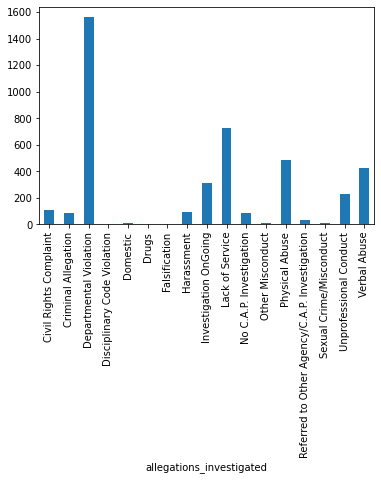

In [57]:
# Graph results!
whitemale_df.groupby('allegations_investigated').size().plot(kind='bar')

<AxesSubplot:xlabel='allegations_investigated'>

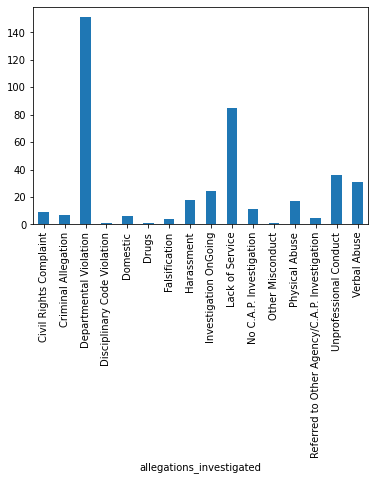

In [58]:
# Graph results!
whitefemale_df.groupby('allegations_investigated').size().plot(kind='bar')

<AxesSubplot:xlabel='allegations_investigated'>

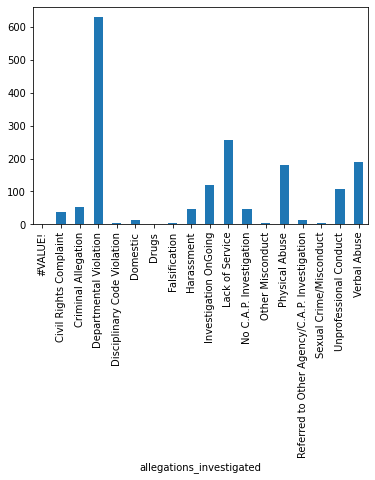

In [59]:
# Graph results!
blackmale_df.groupby('allegations_investigated').size().plot(kind='bar')

<AxesSubplot:xlabel='allegations_investigated'>

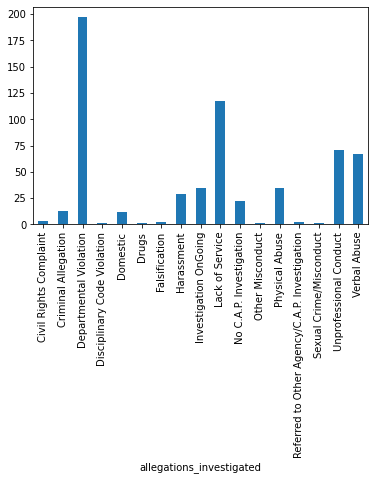

In [60]:
# Graph results!
blackfemale_df.groupby('allegations_investigated').size().plot(kind='bar')

In narrative form, YES. There are vast differences in race and sex and the complaint distribution, which I will break down below: 

Some observations:
* There are more than twice as many white male police officers than that of black police officers.
* There are 1.5 times more black female police officers than white female police officers. 
* Majority of police officers are male. 
* Across ALL race & sex subgroups, Departmental Violation was the most common complaint.
* Proportionally speaking, more white male police officers had complaints for physical abuse compared to their white female police officer counterparts (same with black PO's).
* Proportionally speaking, more white female police officers had complaints for unprofessional conduct than their white male police officer counterparts (same with black PO's).
* Proportionally speaking, more black female police officers had complaints for physical abuse compared to their white female police officer counterparts.
* Tie assigned unit with District #? 